# S&P 500 COMPANIES ANALYSIS

## Import module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import requests
from bs4 import BeautifulSoup

import re
import time

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [3]:
page = requests.get(url)

In [4]:
page

<Response [200]>

In [5]:
soup = BeautifulSoup(page.text,'html.parser')

In [47]:
table = soup.find('table',{'class':'wikitable sortable'})

In [7]:
data = {
    'Ticker Symbol': [],
    'Name': [],
    'Sector': [],
    'Sub-Industry': [],
    'Headquarters': [],
    'Date Added': [],
    'CIK': [],
    'Founded': []
}

In [8]:
for row in table.find_all('tr')[1:]:
    columns = row.find_all('td')
    if len(columns) > 0:
        data['Ticker Symbol'].append(columns[0].text.strip())
        data['Name'].append(columns[1].text.strip())
        data['Sector'].append(columns[2].text.strip())
        data['Sub-Industry'].append(columns[3].text.strip())
        data['Headquarters'].append(columns[4].text.strip())
        data['Date Added'].append(columns[5].text.strip())
        data['CIK'].append(columns[6].text.strip())
        data['Founded'].append(columns[7].text.strip())

In [9]:
df = pd.DataFrame(data)

In [10]:
df

,Ticker Symbol,Name,Sector,Sub-Industry,Headquarters,Date Added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,0000066740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,0000091142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,0000001800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,0001524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,0001041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,0000877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,0001136869,1927


In [11]:
df.to_csv('S&P_output_file.csv', index=False)

In [12]:
df = pd.read_csv('S&P_output_file.csv')

In [13]:
#Basic information about the DataFrame
print("Number of features (columns):", df.shape)
print("Number of observations (rows):", df.shape[0])

Number of features (columns): (503, 8)
Number of observations (rows): 503


In [14]:
print("\nData types of each feature:")
print(df.dtypes)


Data types of each feature:
Ticker Symbol    object
Name             object
Sector           object
Sub-Industry     object
Headquarters     object
Date Added       object
CIK               int64
Founded          object
dtype: object


In [15]:
missing_values = df.isnull().sum()
# number of missing values for each feature
print("\nNumber of missing values for each feature:")
print(missing_values)


Number of missing values for each feature:
Ticker Symbol    0
Name             0
Sector           0
Sub-Industry     0
Headquarters     0
Date Added       0
CIK              0
Founded          0
dtype: int64


# Data Cleaning

### Finding the missing values

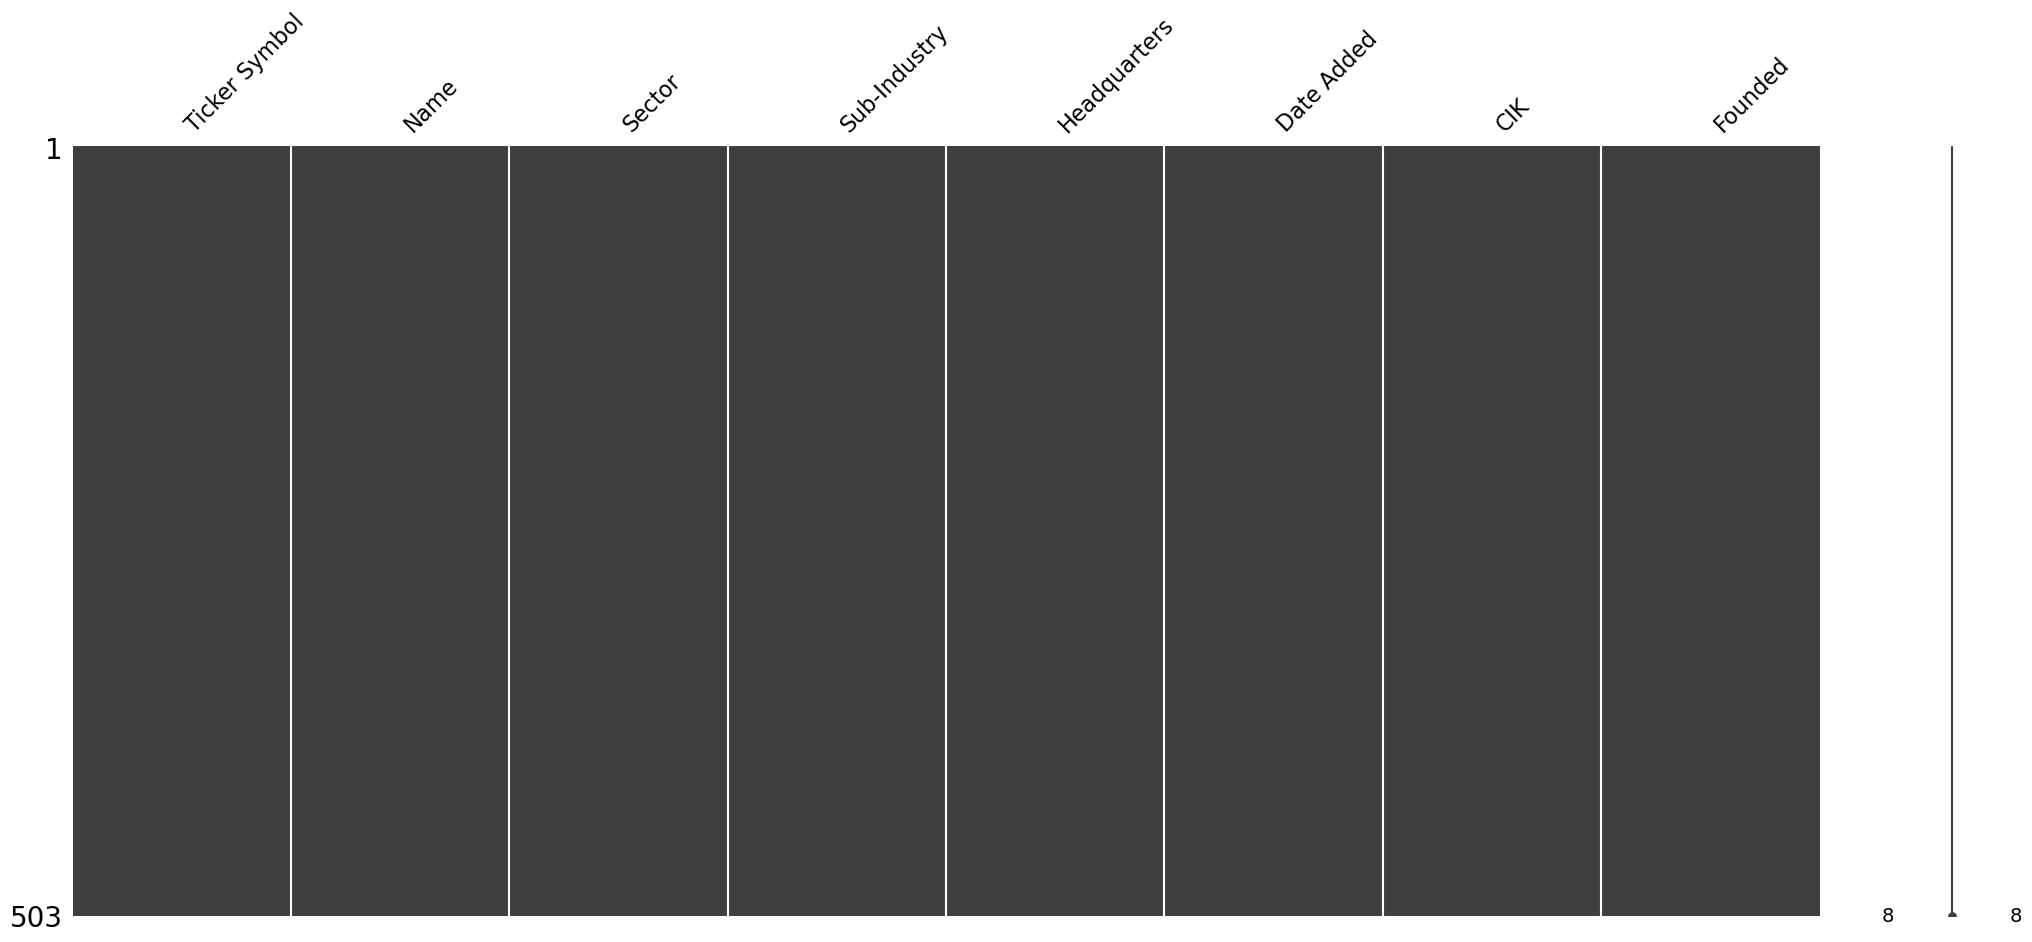

In [16]:
import missingno as msno

msno.matrix(df)
plt.show()

### Removing Special Characters,White spaces and Incorrect Headers

In [17]:
df.columns = [re.sub(r'\W+', '', col) for col in df.columns]

In [18]:
df

,TickerSymbol,Name,Sector,SubIndustry,Headquarters,DateAdded,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


### Converting the Data Types

In [19]:
df['DateAdded'] = pd.to_datetime(df['DateAdded'],errors='coerce')

In [20]:
df['Founded'] = df['Founded'].str.extract('(\d+)', expand=False).astype(float)

In [21]:
df

,TickerSymbol,Name,Sector,SubIndustry,Headquarters,DateAdded,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902.0
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916.0
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888.0
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013.0
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989.0
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011.0
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997.0
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969.0
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927.0


In [22]:
print(df['Headquarters'].unique())

['Saint Paul, Minnesota' 'Milwaukee, Wisconsin' 'North Chicago, Illinois'
 'Dublin, Ireland' 'San Jose, California' 'Santa Clara, California'
 'Arlington, Virginia' 'Columbus, Georgia' 'Allentown, Pennsylvania'
 'San Francisco, California' 'Cambridge, Massachusetts'
 'Charlotte, North Carolina' 'Pasadena, California' 'Tempe, Arizona'
 'Madison, Wisconsin' 'Northbrook, Illinois' 'Mountain View, California'
 'Richmond, Virginia' 'Seattle, Washington'
 'Warmley, Bristol, United Kingdom' 'St. Louis, Missouri'
 'Fort Worth, Texas' 'Columbus, Ohio' 'New York City, New York'
 'Boston, Massachusetts' 'Camden, New Jersey' 'Minneapolis, Minnesota'
 'Berwyn, Pennsylvania' 'Thousand Oaks, California'
 'Wallingford, Connecticut' 'Wilmington, Massachusetts'
 'Canonsburg, Pennsylvania' 'London, UK' 'Houston, Texas'
 'Cupertino, California' 'Hamilton, Bermuda' 'Chicago, Illinois'
 'Rolling Meadows, Illinois' 'Atlanta, Georgia' 'Dallas, Texas'
 'Roseland, New Jersey' 'Memphis, Tennessee' 'Mentor, Ohio'

### Splitting columns

In [23]:
df[['City', 'State']] = df['Headquarters'].str.rsplit(', ', n=1, expand=True)
print(df[['City', 'State']])

              City       State
0       Saint Paul   Minnesota
1        Milwaukee   Wisconsin
2    North Chicago    Illinois
3    North Chicago    Illinois
4           Dublin     Ireland
..             ...         ...
498   White Plains    New York
499     Louisville    Kentucky
500   Lincolnshire    Illinois
501         Warsaw     Indiana
502     Parsippany  New Jersey

[503 rows x 2 columns]


In [24]:
df.head(25)

,TickerSymbol,Name,Sector,SubIndustry,Headquarters,DateAdded,CIK,Founded,City,State
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902.0,Saint Paul,Minnesota
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916.0,Milwaukee,Wisconsin
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888.0,North Chicago,Illinois
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013.0,North Chicago,Illinois
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989.0,Dublin,Ireland
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982.0,San Jose,California
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969.0,Santa Clara,California
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981.0,Arlington,Virginia
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955.0,Columbus,Georgia
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999.0,Santa Clara,California


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TickerSymbol  503 non-null    object        
 1   Name          503 non-null    object        
 2   Sector        503 non-null    object        
 3   SubIndustry   503 non-null    object        
 4   Headquarters  503 non-null    object        
 5   DateAdded     503 non-null    datetime64[ns]
 6   CIK           503 non-null    int64         
 7   Founded       503 non-null    float64       
 8   City          503 non-null    object        
 9   State         503 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 39.4+ KB


In [26]:
df.describe(include='all')

,TickerSymbol,Name,Sector,SubIndustry,Headquarters,DateAdded,CIK,Founded,City,State
count,503,503,503,503,503,503,5.030000e+02,503.000000,503,503
unique,503,503,11,127,251,NaN,NaN,NaN,240,46
top,MMM,3M,Industrials,Health Care Equipment,"New York City, New York",NaN,NaN,NaN,New York City,California
freq,1,1,79,18,40,NaN,NaN,NaN,40,70
mean,NaN,NaN,NaN,NaN,NaN,2001-03-31 19:39:28.986083456,8.137551e+05,1955.485089,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1957-03-04 00:00:00,1.800000e+03,1784.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1992-08-16 00:00:00,9.911900e+04,1920.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2007-10-26 00:00:00,8.982930e+05,1971.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2016-12-19 00:00:00,1.163946e+06,1994.000000,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,2024-04-02 00:00:00,1.996862e+06,2024.000000,NaN,NaN


## EDA and Data Visualization


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Analysis

### Histogram 

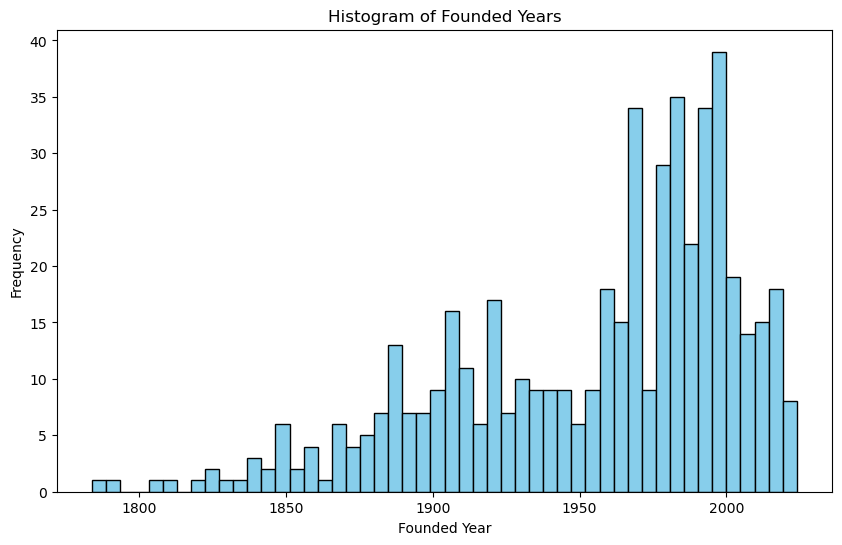

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['Founded'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Founded Years')
plt.xlabel('Founded Year')
plt.ylabel('Frequency')
plt.show()

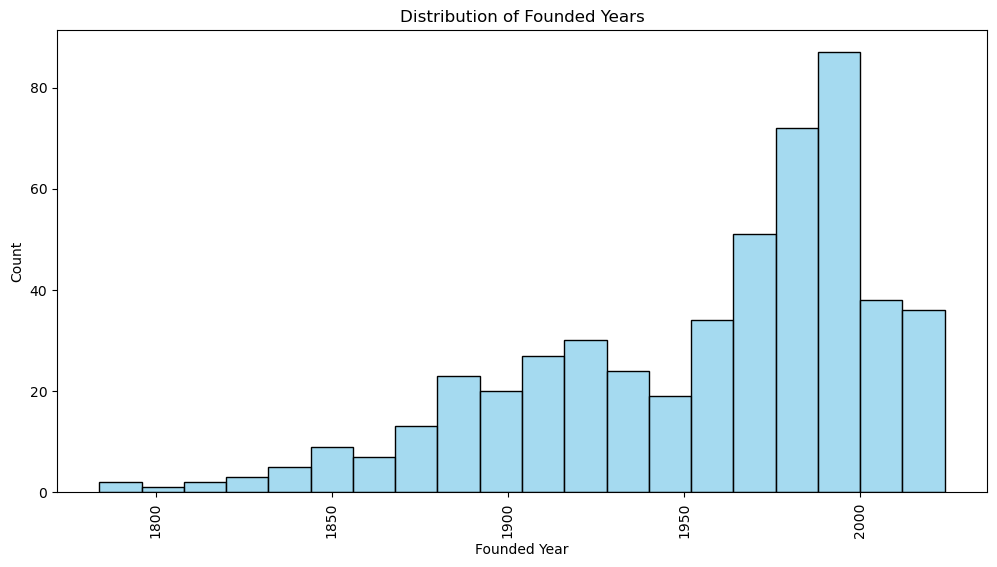

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Founded'], bins=20, color='skyblue')
plt.title('Distribution of Founded Years')
plt.xlabel('Founded Year')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

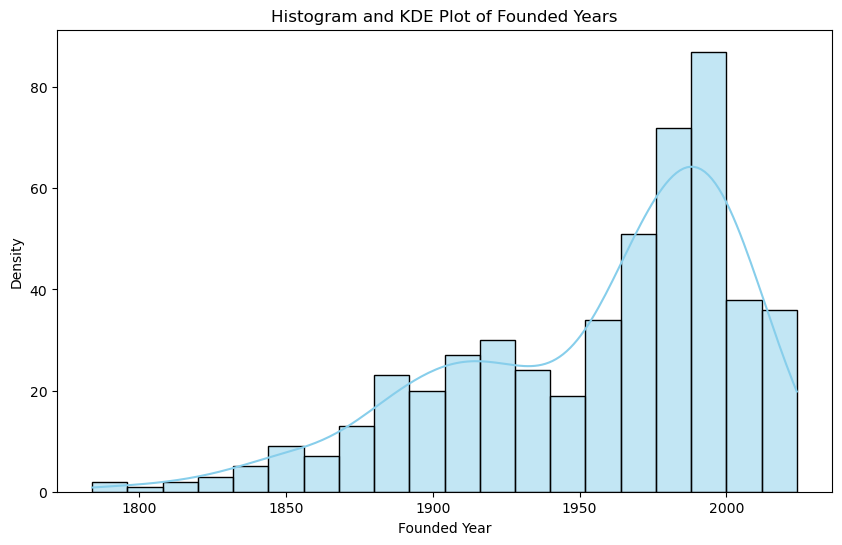

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Founded'], bins=20, kde=True, color='skyblue')
plt.title('Histogram and KDE Plot of Founded Years')
plt.xlabel('Founded Year')
plt.ylabel('Density')
plt.show()

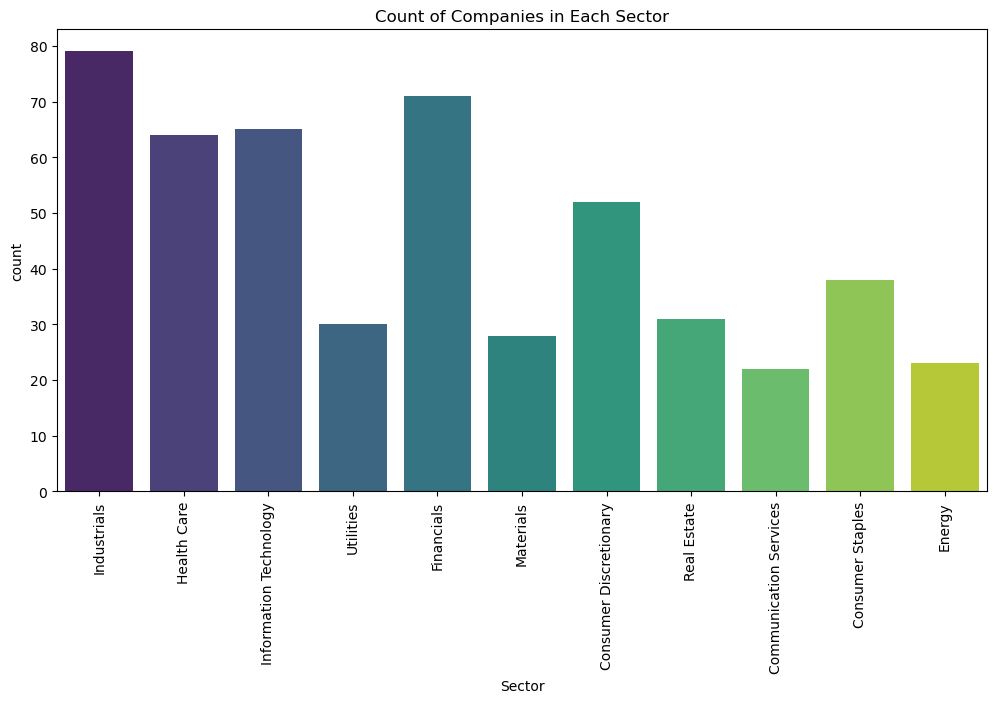

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sector', data=df, palette='viridis')
plt.title('Count of Companies in Each Sector')
plt.xticks(rotation=90)
plt.show()

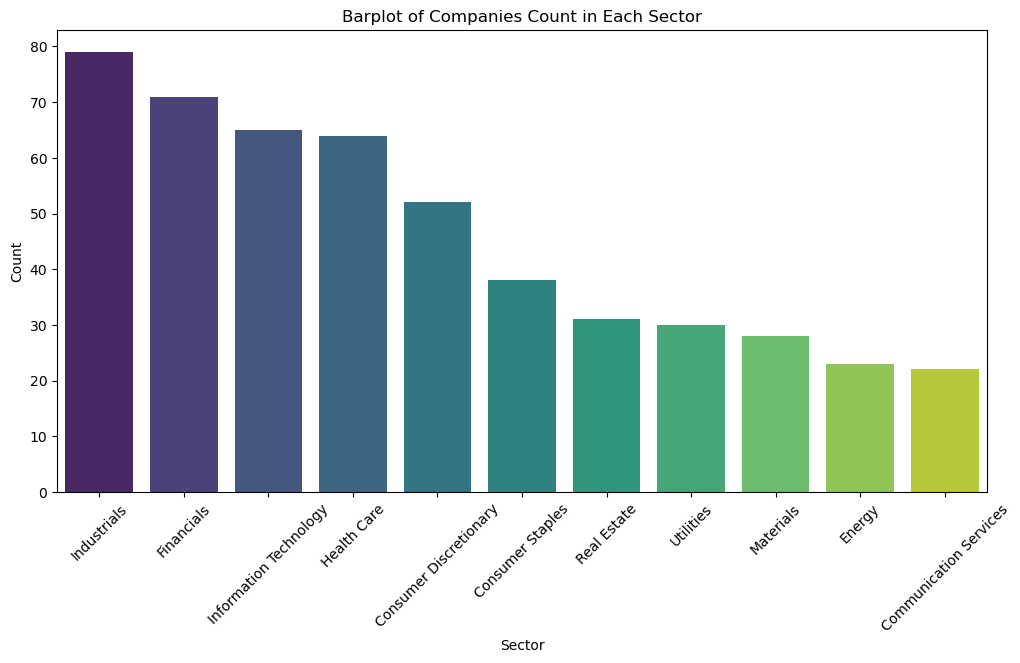

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Sector'].value_counts().index, y=df['Sector'].value_counts(), palette='viridis')
plt.title('Barplot of Companies Count in Each Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

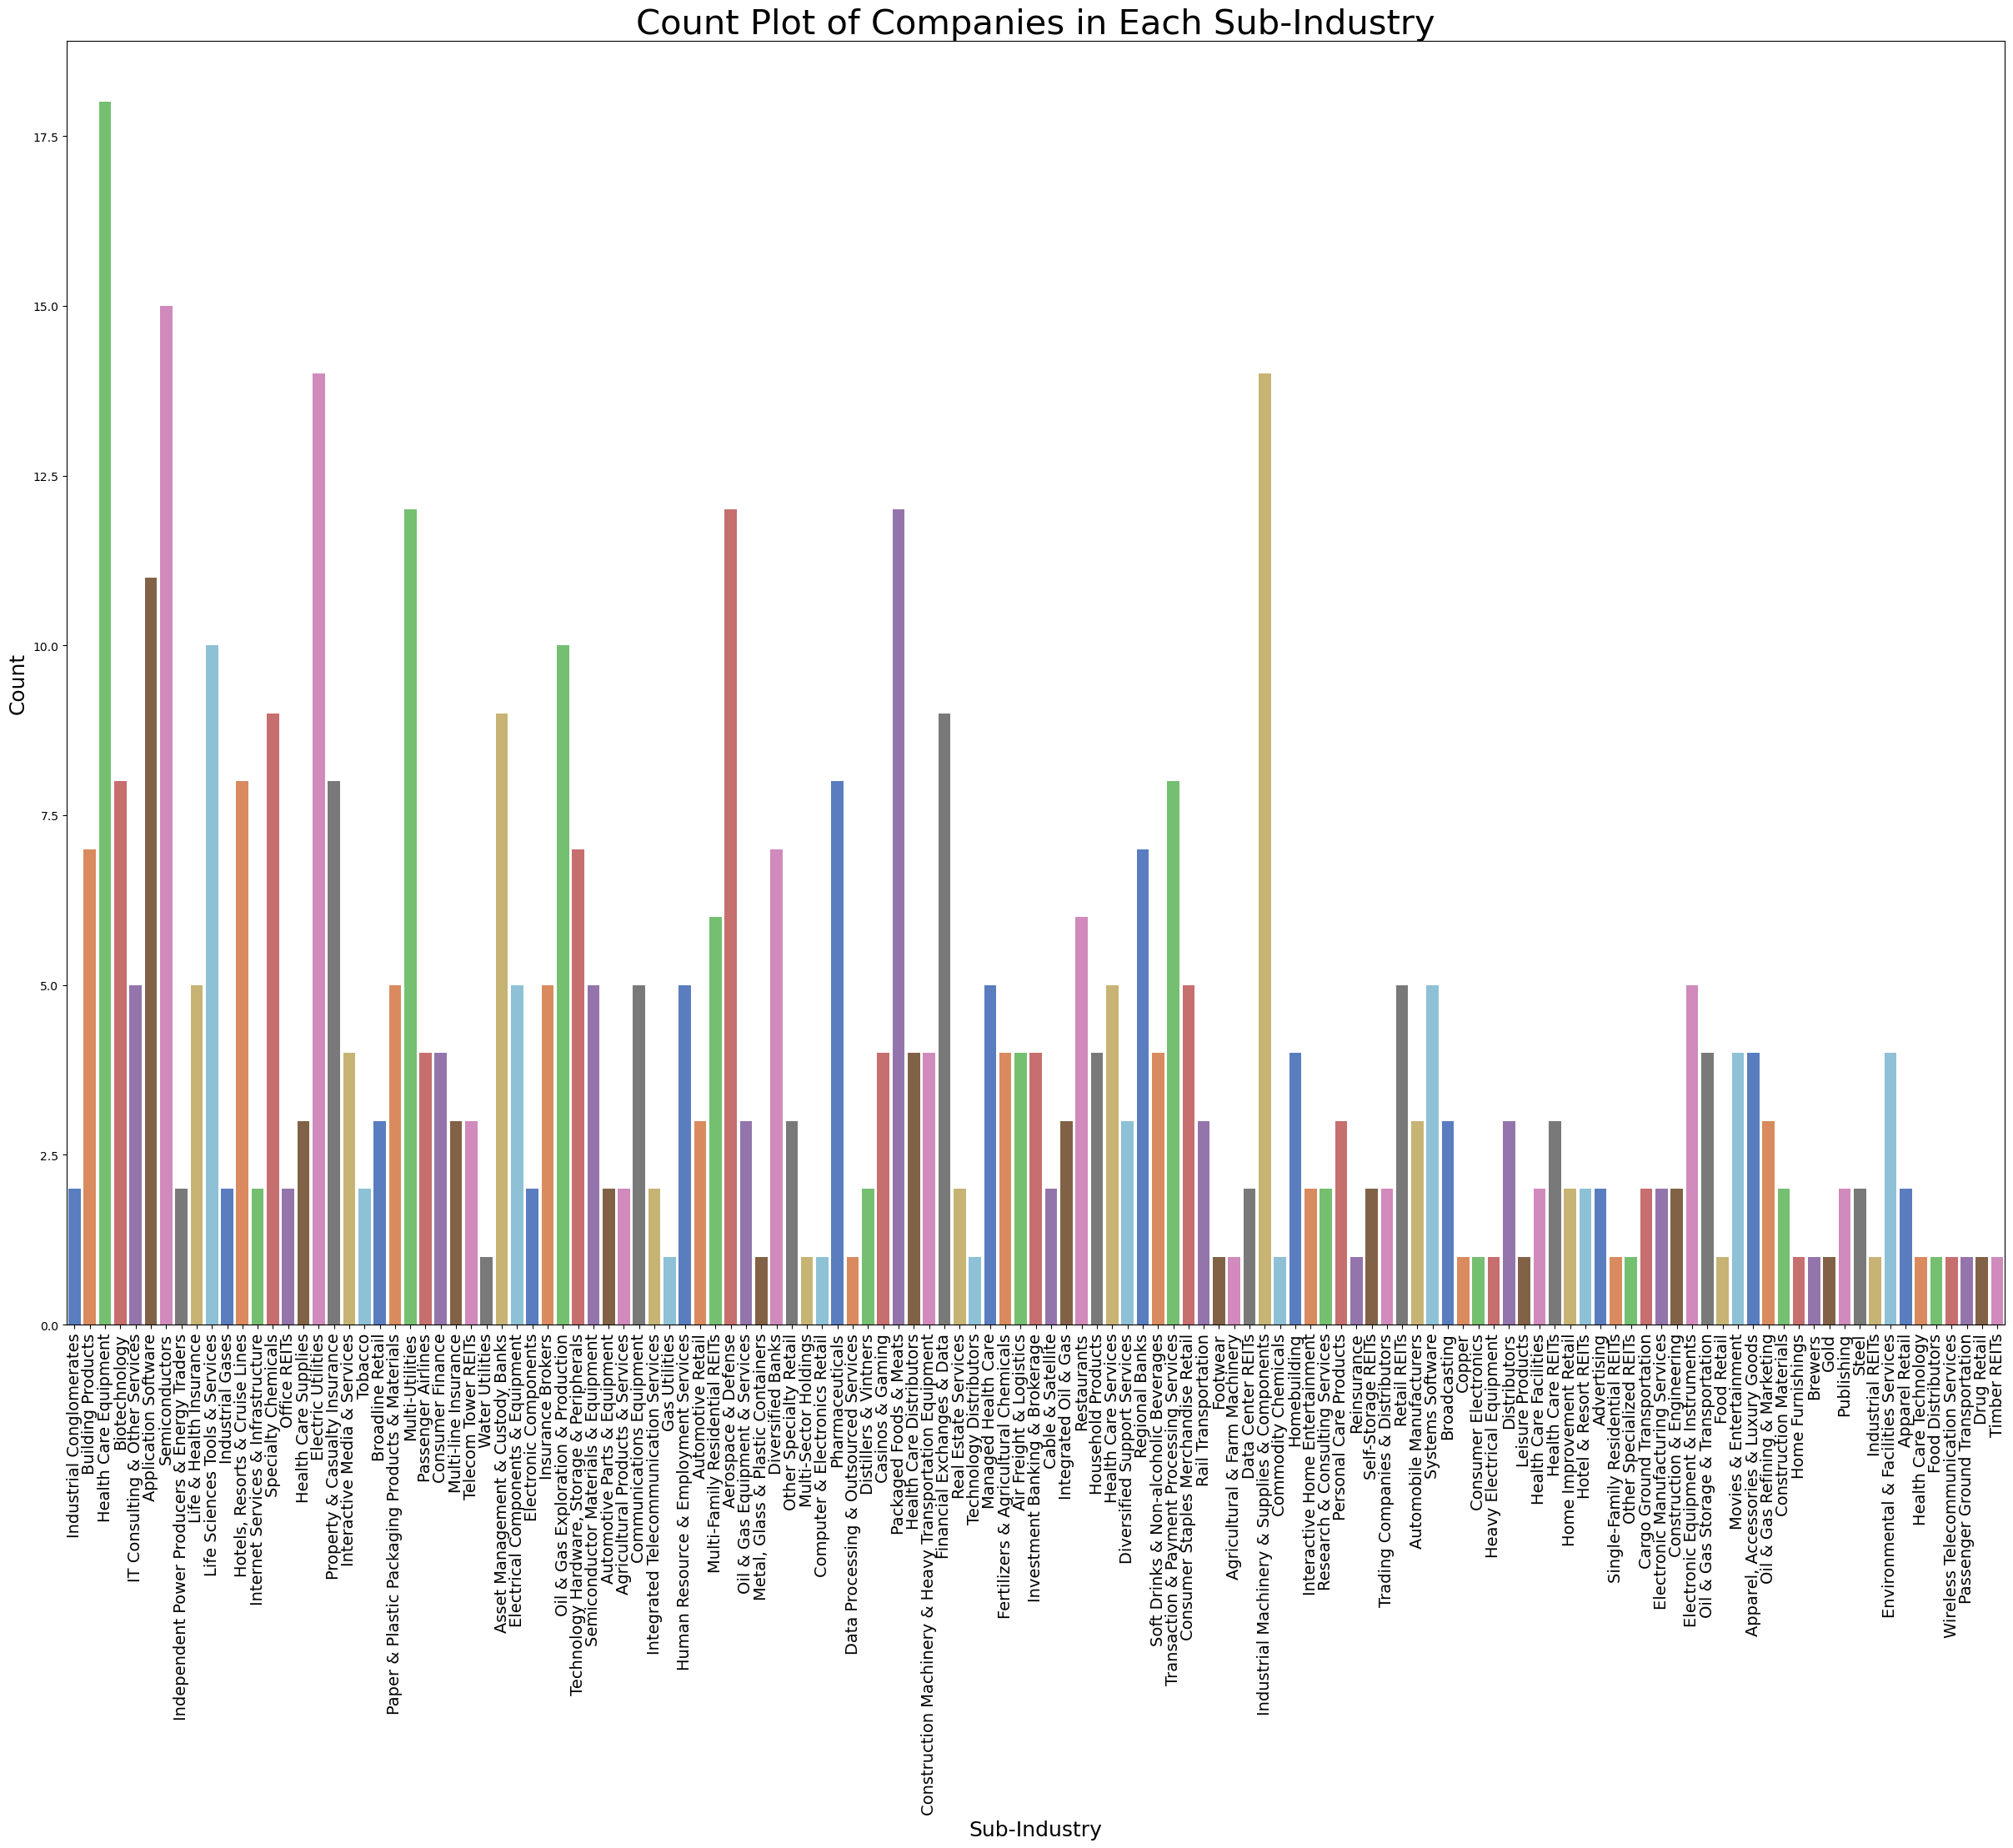

In [33]:
plt.figure(figsize=(30, 20))
sns.countplot(x='SubIndustry', data=df, palette='muted')
plt.title('Count Plot of Companies in Each Sub-Industry',fontsize=30)
plt.xlabel('Sub-Industry',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xticks(fontsize=14,rotation=90)
plt.show()

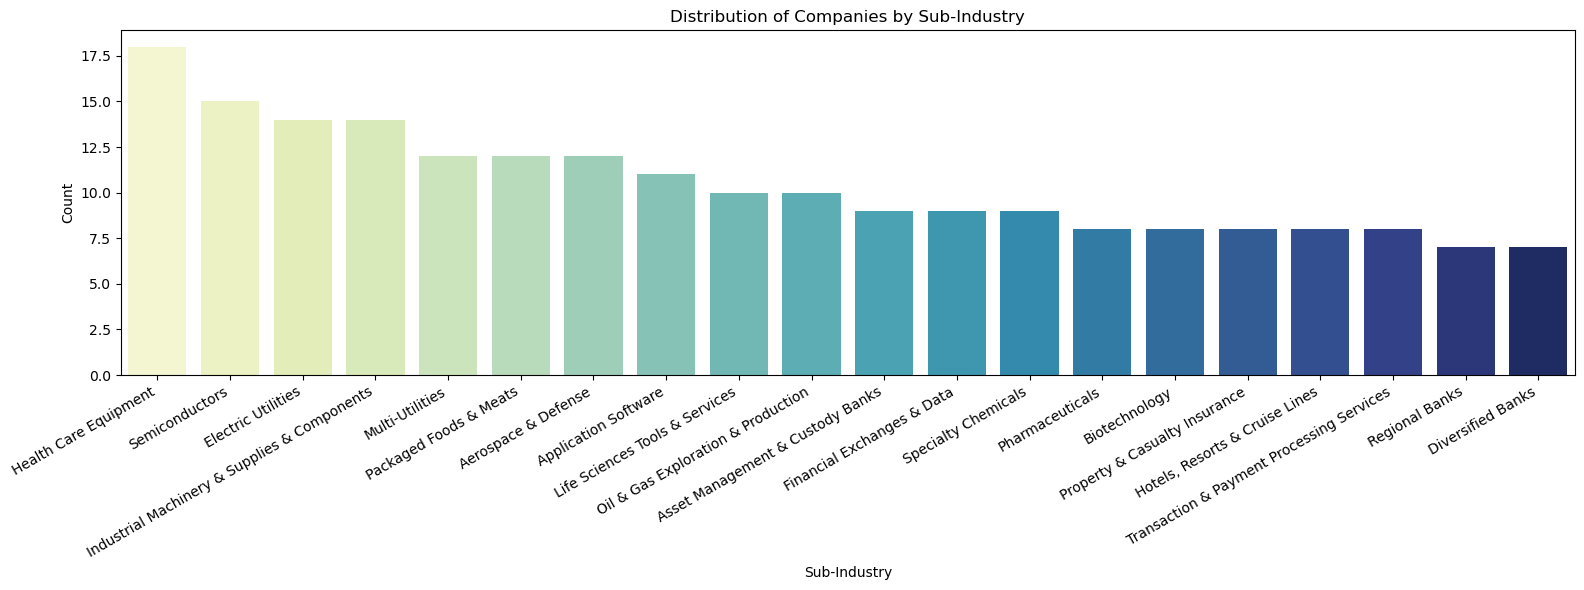

In [34]:
# Explore Sub-Industry distribution
plt.figure(figsize=(16, 6))
subindustry_counts = df['SubIndustry'].value_counts().head(20)  # Assuming 20 as an example
sns.countplot(x='SubIndustry', data=df, palette='YlGnBu', order=subindustry_counts.index)
plt.title('Distribution of Companies by Sub-Industry')
plt.xlabel('Sub-Industry')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

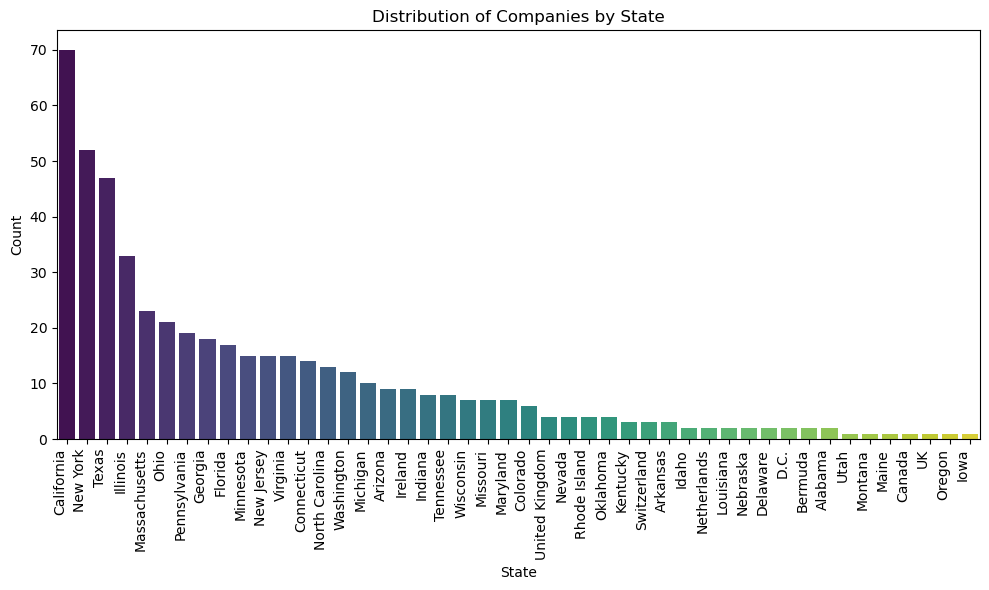

In [35]:
# Explore State distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=df, palette='viridis', order=df['State'].value_counts().index)
plt.title('Distribution of Companies by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

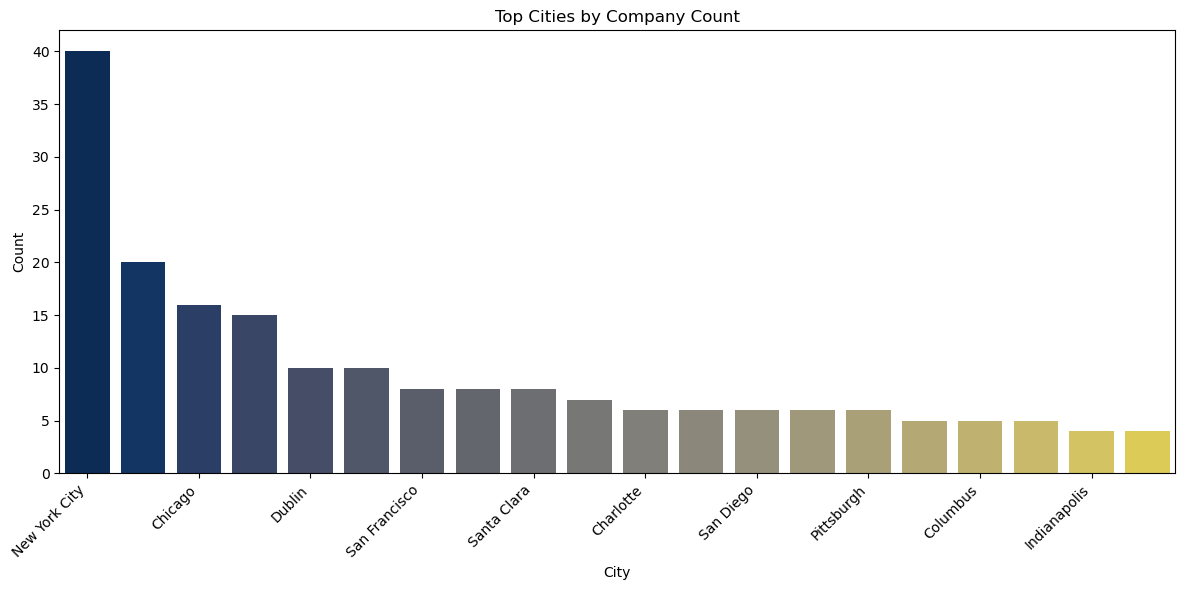

In [36]:
# Explore City distribution
plt.figure(figsize=(12, 6))
city_counts = df['City'].value_counts().head(20)  # Assuming 20 as an example
sns.countplot(x='City', data=df, palette='cividis', order=city_counts.index)
plt.title('Top Cities by Company Count')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.xticks(range(0, len(city_counts.index), 2), city_counts.index[::2])
plt.tight_layout()
plt.show()

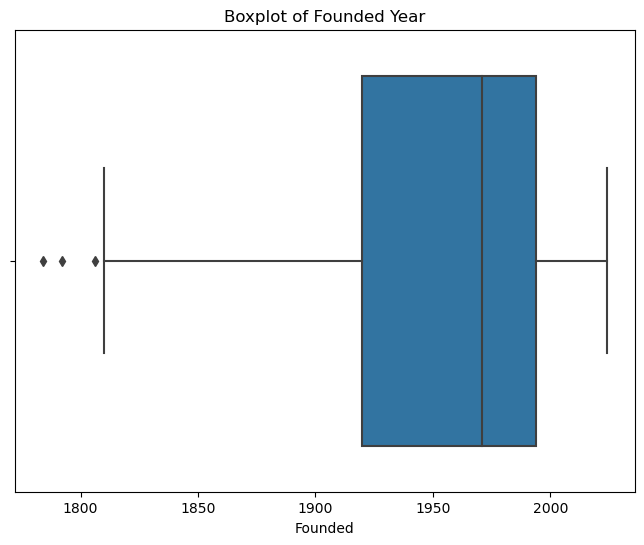

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Founded'])
plt.title('Boxplot of Founded Year')
plt.show()

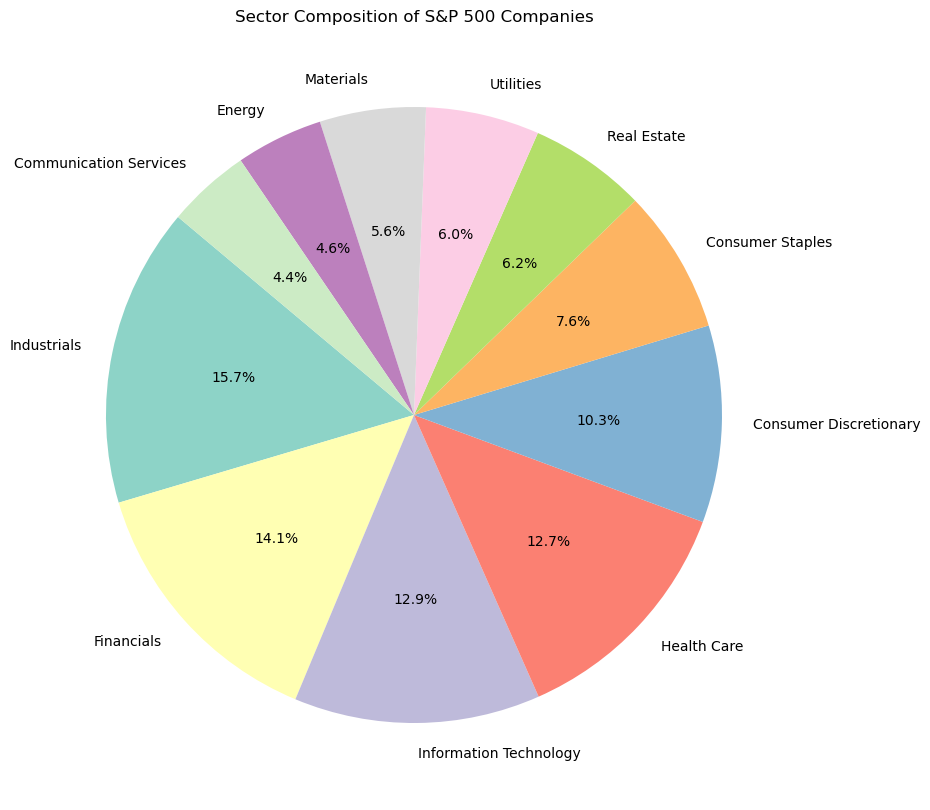

In [38]:
#Pie Chart of Sector Composition:

# Calculate the proportion of companies in each sector
sector_counts = df['Sector'].value_counts()

#pie chart
plt.figure(figsize=(10, 10))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Sector Composition of S&P 500 Companies')
plt.show()

## Bivariate analysis

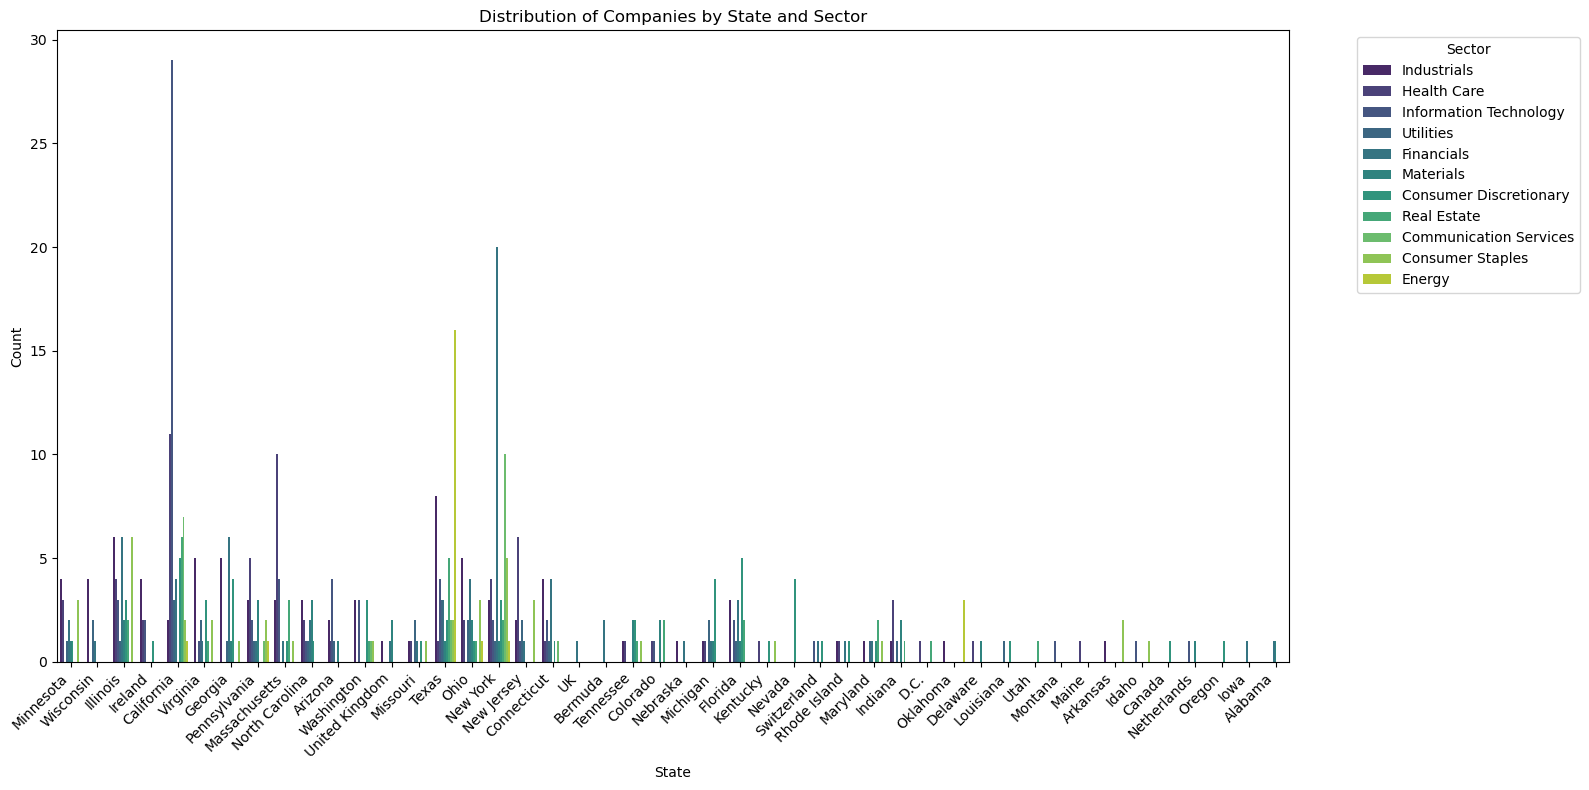

In [39]:
# Explore the relationship between State and Sector
plt.figure(figsize=(16, 8))
sns.countplot(x='State', hue='Sector', data=df, palette='viridis')
plt.title('Distribution of Companies by State and Sector')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


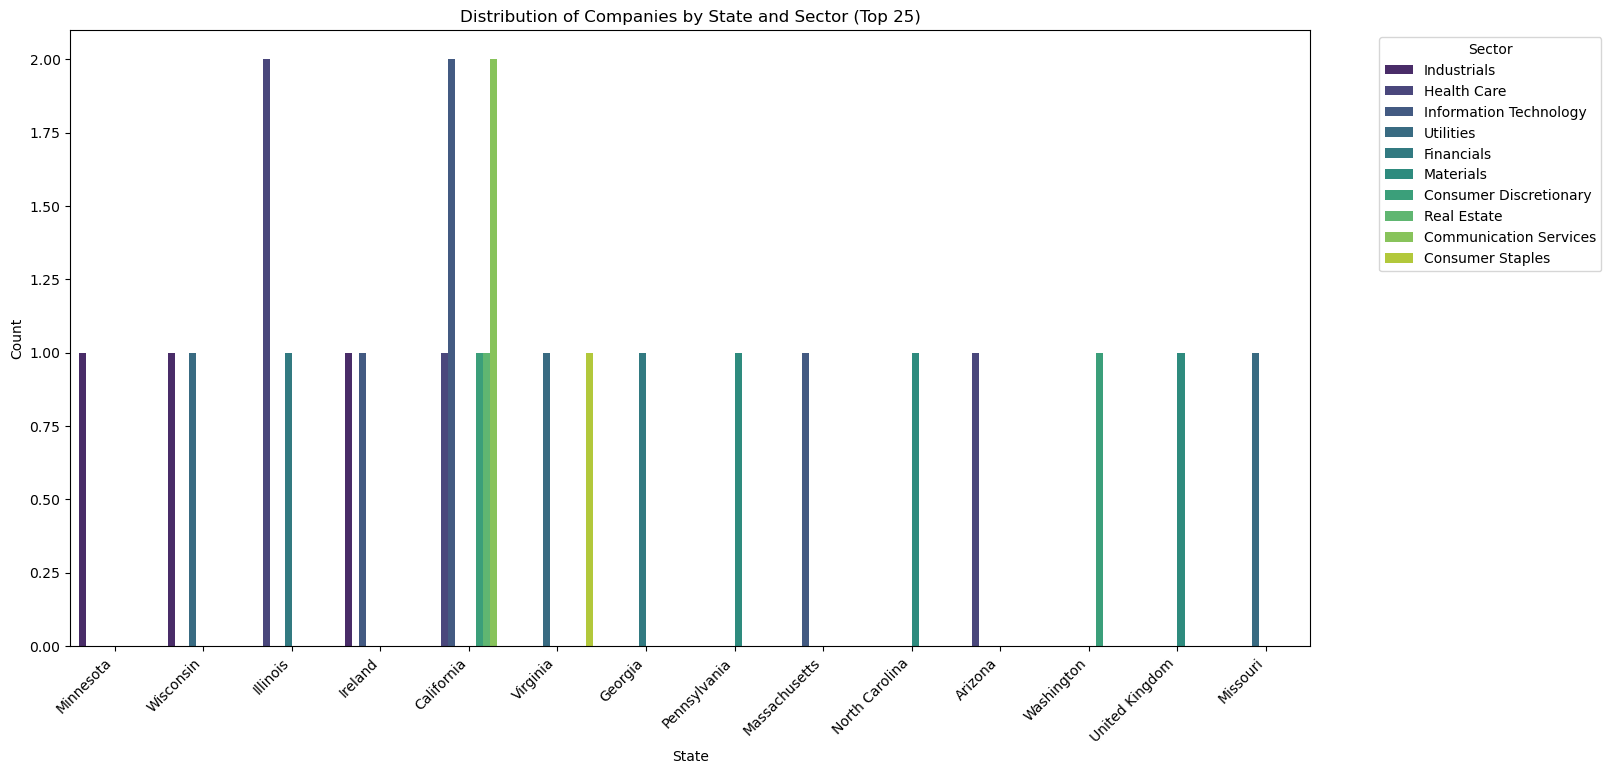

In [40]:
df_top25 = df.head(25)

# Explore the relationship between State and Sector for the top 25 rows
plt.figure(figsize=(16, 8))
sns.countplot(x='State', hue='Sector', data=df_top25, palette='viridis')
plt.title('Distribution of Companies by State and Sector (Top 25)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

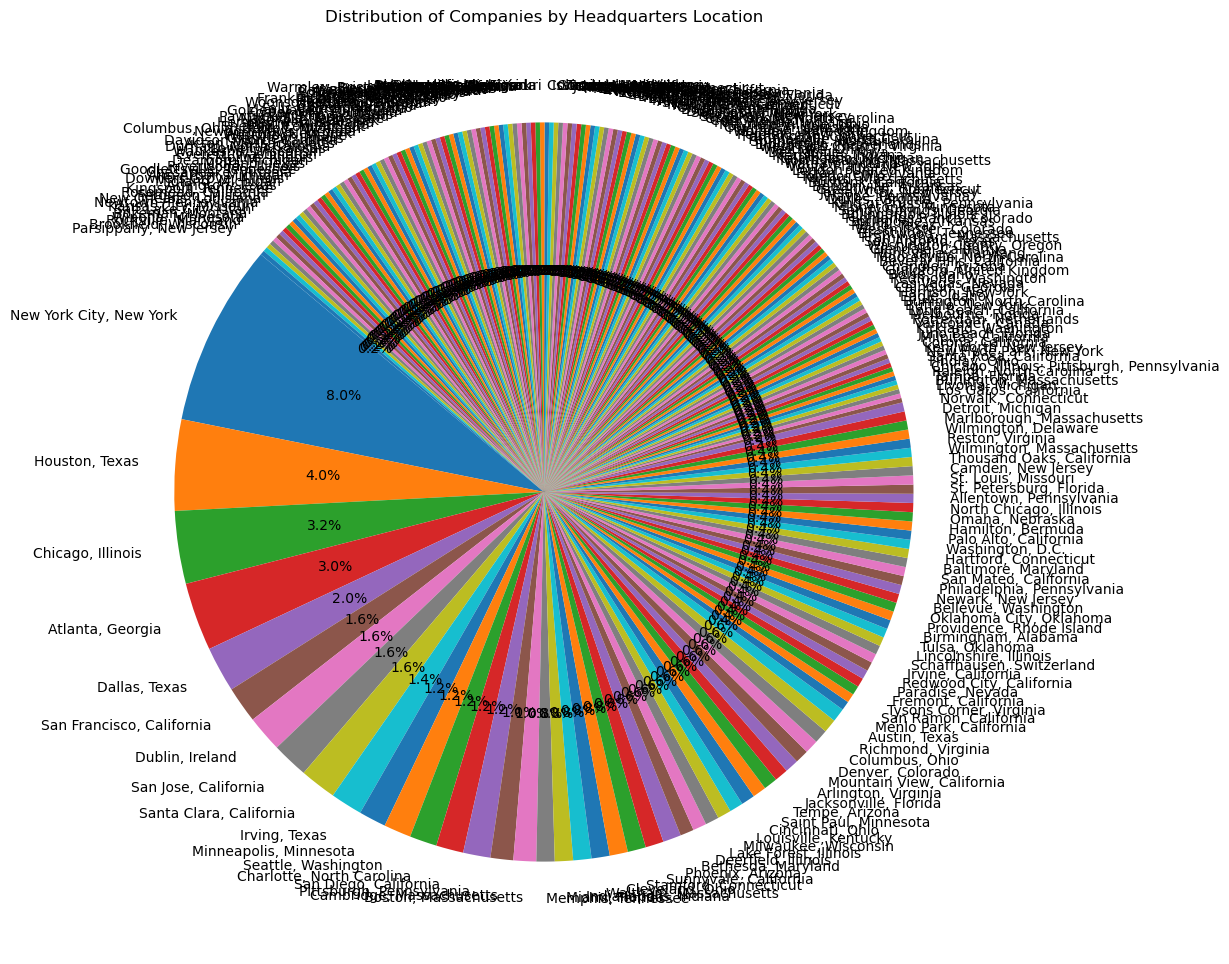

In [41]:
headquarters_counts = df['Headquarters'].value_counts()
plt.figure(figsize=(12, 12))
plt.pie(headquarters_counts, labels=headquarters_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Companies by Headquarters Location')
plt.show()

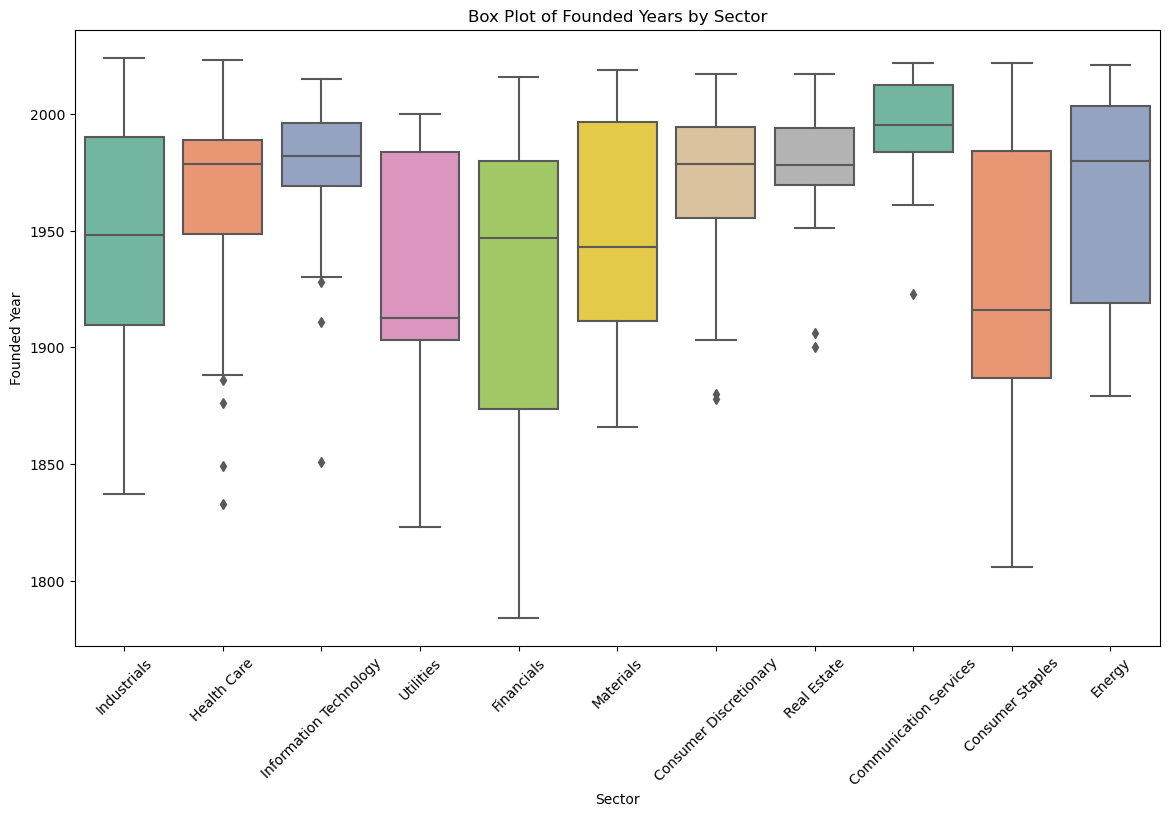

In [42]:
#Box plot of Founded Years by Sector
plt.figure(figsize=(14, 8))
sns.boxplot(x='Sector', y='Founded', data=df, palette='Set2')
plt.title('Box Plot of Founded Years by Sector')
plt.xlabel('Sector')
plt.ylabel('Founded Year')
plt.xticks(rotation=45)
plt.show()

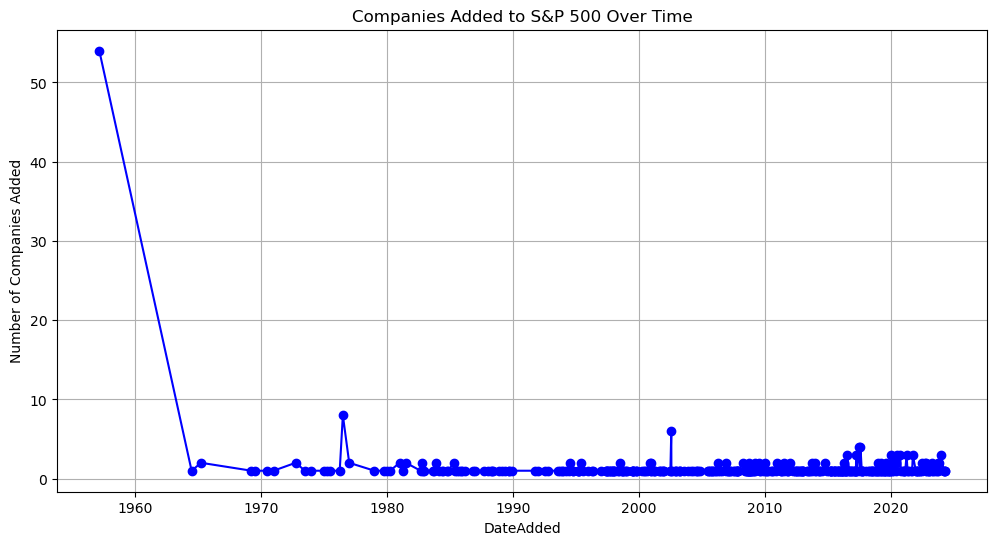

In [43]:
df['DateAdded'] = pd.to_datetime(df['DateAdded'])

# Group by 'Date Added',count the number of companies added on each date
companies_added_over_time = df['DateAdded'].value_counts().sort_index()

#time series plot
plt.figure(figsize=(12, 6))
plt.plot(companies_added_over_time.index, companies_added_over_time.values, marker='o', linestyle='-', color='blue')
plt.title('Companies Added to S&P 500 Over Time')
plt.xlabel('DateAdded')
plt.ylabel('Number of Companies Added')
plt.grid(True)
plt.show()

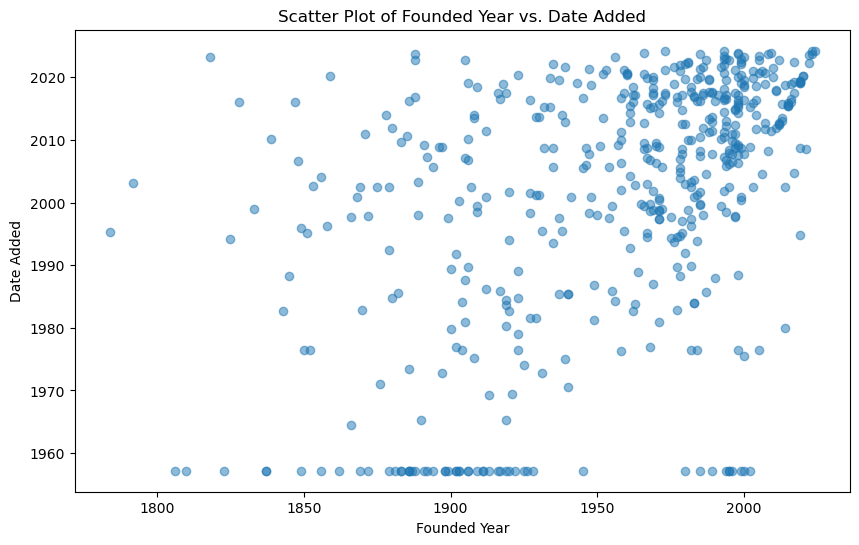

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Founded'], df['DateAdded'], alpha=0.5)
plt.title('Scatter Plot of Founded Year vs. Date Added')
plt.xlabel('Founded Year')
plt.ylabel('Date Added')
plt.show()

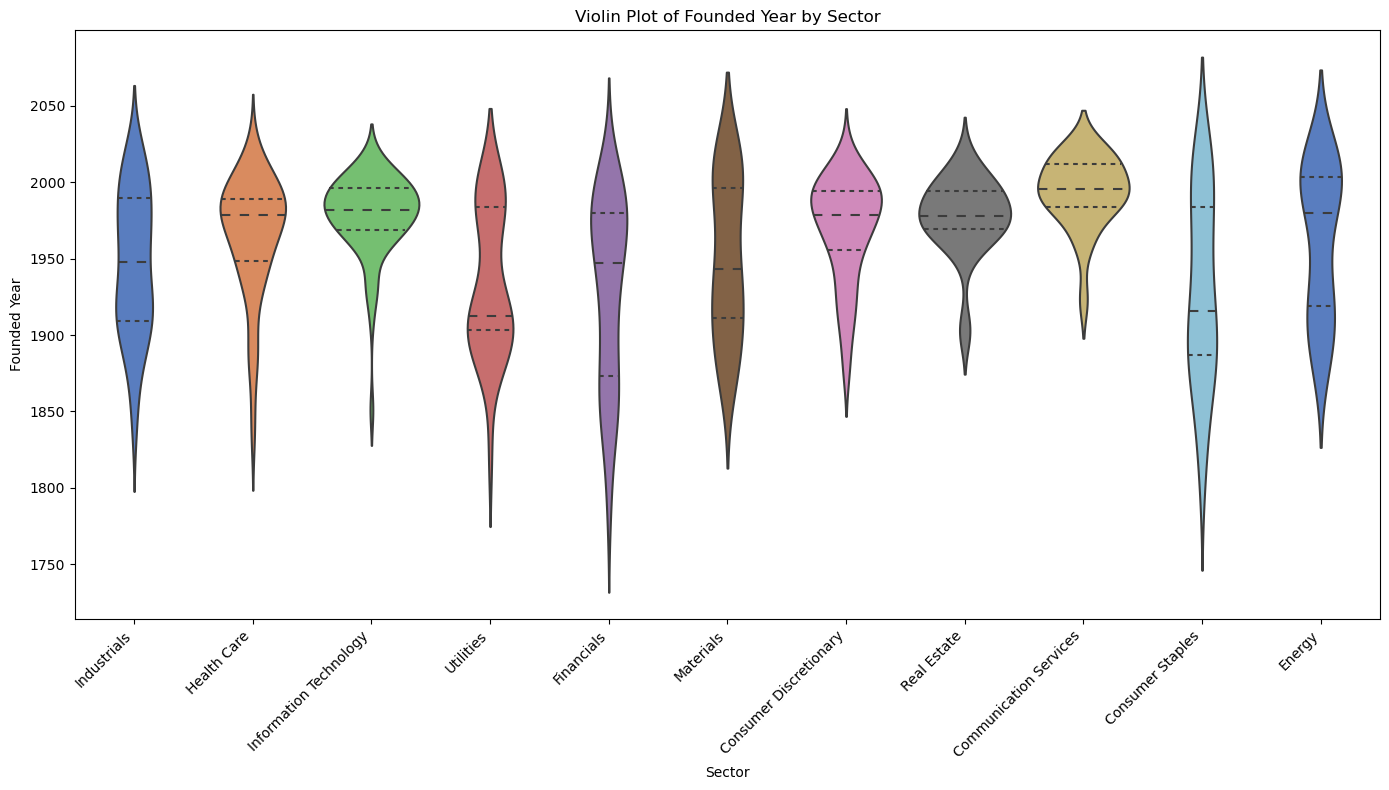

In [45]:
#Violin plot for Founded across different sectors
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sector', y='Founded', data=df, palette='muted', inner='quartile')
plt.title('Violin Plot of Founded Year by Sector')
plt.xlabel('Sector')
plt.ylabel('Founded Year')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

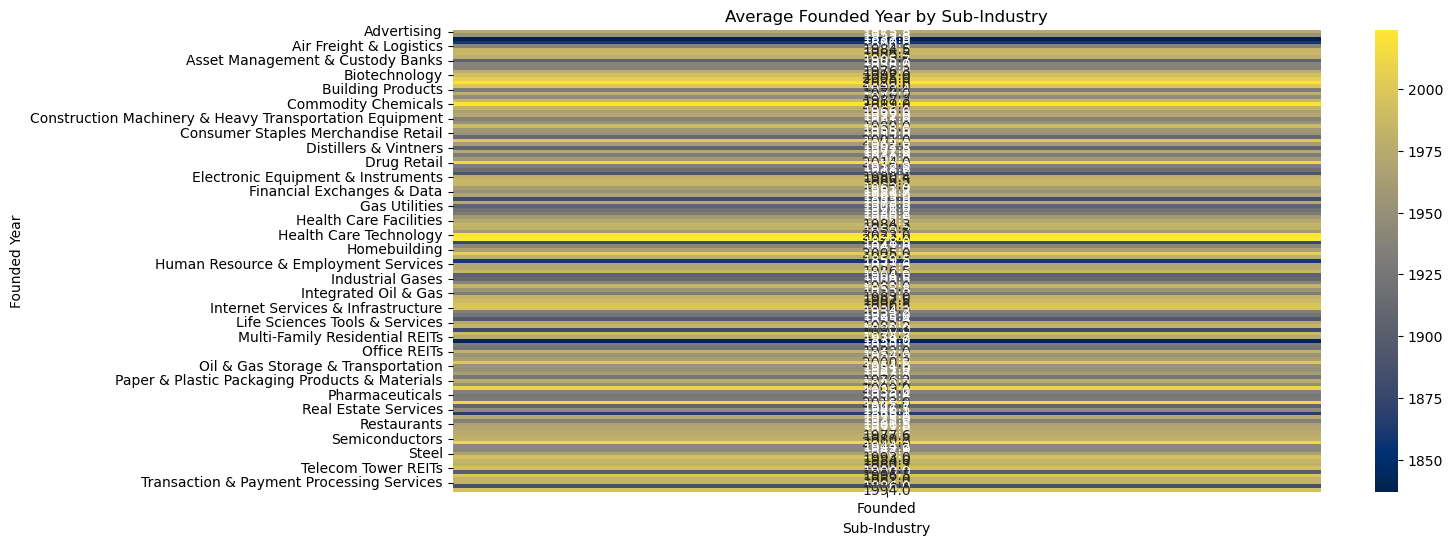

In [46]:
# Pivot Table
pivot_subindustry_founded = df.pivot_table(index='SubIndustry', values='Founded', aggfunc='mean')

# Plotting
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_subindustry_founded, cmap='cividis', annot=True, fmt=".1f")
plt.title('Average Founded Year by Sub-Industry')
plt.xlabel('Sub-Industry')
plt.ylabel('Founded Year')
plt.show()